# AnyoneAI - Project I

# An analysis of NBA players in the 2021/2022 season

Hi! this is the first of several projects we're going to be working on during this course. 
You will be expected to finish this on your own, but you can use the available channels on Discord to ask questions and help others. Please read the entire notebook before starting, this will give you a better idea of what you need to accomplish.

This project will rely heavily in the use of API as data sources. Contrary to most machine learning challenges and competitions, working in the industry usually requires the ML Developer to work with multiple teams and use heterogeneous sources of information to get the necessary data to solve a particular problem. Access to data is often provided through application programming interfaces (APIs), whether internal or external to the organization. It is very important to understand how to interact with APIs to collect data in our day to day work.

You might be wondering: why basketball? The main reason is availability of data.

The sport is played at a fast pace, with hundreds of plays in each single game, thousands of games in a season, and with a relatively small amount of on-court players, which gives them a lot of interactions with the ball, which in turn provides an oportunity to collect a great amount of data about each player performance.

These are the objectives of the project:
- Understanding how to query an API to create a dataset with Python and Pandas
- Learning how to cleanup a dataset and generate new fields from calculated data
- Storing the created dataset in a serialized manner
- Generating statistics about the data
- Visualizing data

## Introduction

### A brief description of basketball and the NBA

The National Basketball Association is the main basketball league in the United States of America. It currently features 30 teams from different cities, divided in 2 conferences (East and West) of 15 teams. Each team plays a total of 82 games during the regular season. After that, the 8 teams with better records from each conference are seeded in a playoff format, with the winner of each conference playing the finals to determine the eventual champion. NBA seasons usually play out between october of one year, to june of the next year, so for example the current season being played is called the 2021/2022 season.

As in most leagues in the world, the game is played 5 vs 5 players, with as many as 9 reserve players that can rotate with the starters as many times as the team wants. Games are played to 48 minutes, so the total amount of minutes of combined play time for any team in a single game with no added time is 240 minutes. If the score is tied at the end of the 48 minutes, 5 minutes of extra time are played, this continues until a winner is decided.

Even though they can play multiple positions, players are usually classified according to the following positions:

- Guards
    - Point Guards
    - Shooting Guards
- Forwards
    - Small Forwards
    - Power Forwards
- Centers

We will mainly focus on the three main positions: Guards/Forwards/Centers

### The dataset

You'll be in charge of creating our dataset. We want to create a single pandas dataframe with information about all active players in the current NBA season. 
The dataset needs to have the following structure:

- Personal Information
    - player_id (int) (INDEX) 
    - player_name (str)
    - team_name (str)
    - position (str)
    - height (int) (in centimeters) 
    - weight (float) (in kilograms)
    - country of origin (str)
    - date_of_birth (datetime)
    - age (str) (years and months)
    - years_of_experience (int) (years since entering the league)
    - Draft position (int)
- Player career statistics
    - games played (int)
    - minutes per game (float)
    - points per game (float)
    - rebounds per game (float)
    - assists per game (float)
    - steals per game (float)
    - blocks per game (float)
- Misc
    - salary in dollars (int) (contract value for this season only)

Here is a sample of how the final result should look like:

In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [3]:
import pandas as pd

sample_dict = {
    'PLAYER_NAME': {200765: 'Rajon Rondo',  203107: 'Tomas Satoransky',  204060: 'Joe Ingles'},
    'TEAM_NAME': {200765: 'Cavaliers', 203107: 'Wizards', 204060: 'Trail Blazers'},
    'POSITION': {200765: 'Guard', 203107: 'Guard', 204060: 'Forward'},
    'HEIGHT': {200765: 185, 203107: 201, 204060: 203},
    'WEIGHT': {200765: 82, 203107: 95, 204060: 100},
    'COUNTRY': {200765: 'USA', 203107: 'Czech Republic', 204060: 'Australia'},
    'BIRTHDATE': {200765: pd.Timestamp('1986-02-22 00:00:00'), 203107: pd.Timestamp('1991-10-30 00:00:00'), 204060: pd.Timestamp('1987-10-02 00:00:00')},
    'SEASON_EXP': {200765: 15, 203107: 5, 204060: 7},
    'DRAFT_NUMBER': {200765: '21', 203107: '32', 204060: 'Undrafted'},
    'GP': {200765: 957, 203107: 388, 204060: 590},
    'MIN': {200765: 29.9, 203107: 22.2, 204060: 25.7},
    'PTS': {200765: 9.8, 203107: 6.9, 204060: 8.6},
    'REB': {200765: 4.5, 203107: 2.9, 204060: 3.2},
    'AST': {200765: 7.9, 203107: 4.1, 204060: 3.8},
    'STL': {200765: 1.6, 203107: 0.8, 204060: 0.9},
    'BLK': {200765: 0.1, 203107: 0.2, 204060: 0.2},
    'SALARY': {200765: 2641691, 203107: 10468119, 204060: 14000000},
    'AGE': {200765: '36 years, 1 months, 19 days', 203107: '30 years, 5 months, 11 days', 204060: '34 years, 6 months, 8 days'}
}
example_df = pd.DataFrame(sample_dict)
example_df

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,AGE
200765,Rajon Rondo,Cavaliers,Guard,185,82,USA,1986-02-22,15,21,957,29.9,9.8,4.5,7.9,1.6,0.1,2641691,"36 years, 1 months, 19 days"
203107,Tomas Satoransky,Wizards,Guard,201,95,Czech Republic,1991-10-30,5,32,388,22.2,6.9,2.9,4.1,0.8,0.2,10468119,"30 years, 5 months, 11 days"
204060,Joe Ingles,Trail Blazers,Forward,203,100,Australia,1987-10-02,7,Undrafted,590,25.7,8.6,3.2,3.8,0.9,0.2,14000000,"34 years, 6 months, 8 days"


##1. Collecting information for building our dataset

In this section, we're only going to work on collecting the necessary raw data to build the required dataset. Don't worry about finishing everything here, we'll generate the appropiate fields and merge the data into a single dataframe in the next section.

To get the information, you can use any public and free API you can find, but you have to provide the code that gets the information here. We recommend using this API:
 
- https://github.com/swar/nba_api

    This is a Python library that can be used to obtain data from stats.nba.com, it provides a set of methods that abstracts you from making the http calls, but directly makes calls to nba stats page and parses the results. [Here](https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb) are a couple of examples on how to use it.
    

A few notes on data collection:

- Start simple. Try to get all the required information for 1 player, read the APIs documentation carefuly, then think about how to use them to collect all players data. 

- Please bear in mind that the most public APIs have some kind of rate limit, so you have to be careful about iterating on data and making lots of requests in a short amount of time (a 1 second delay between calls to the api should be enough). Once you've collected what you needed, save it to file in order to retrieve it later without calling the API again.

- A key consideration: we only want data about players that have played in the current season, so make sure to filter those out before collecting the rest of the information.

- There is at least one piece of information you're not going to find in both of those APIs: the player contract information. Use the "contracts.csv" that is provided to you.

1.1- Create a function to find all ACTIVE players, meaning players that are listed with a team in the 2021/2022 season. For now you only need the player id, name, and team. Save the dataframe to a csv named "nba_current_players_list.csv". The function should return the dataframe.

Hint: you should find an API method that can give you a list of players in just one call, this way we can filter those players we're interested in, and later will make calls for each specific player.

Consider dropping: 
- All players with TEAM_ID == 0
- All players with GAMES_PLAYED_FLAG == N
- Players with id 1630597 & 1630492 (These guys are a problem ;))

In [4]:
!pip install nba_api

In [5]:
### Complete in this cell: get all active players from the api
import pandas as pd
from nba_api.stats.endpoints import commonallplayers

def get_and_save_players_list():
    
    ## COMMON INFO 1
    p_info_df = commonallplayers.CommonAllPlayers(timeout = 30).get_data_frames()[0]
    p_info_df = p_info_df[  (p_info_df.GAMES_PLAYED_FLAG != 'N') &
                            (p_info_df.TEAM_ID != 0) &
                            (p_info_df.PERSON_ID != 1630492) & 
                            (p_info_df.PERSON_ID != 1630597) ]
    
    p_info_df.rename(columns = {'PERSON_ID':'PLAYER_ID','DISPLAY_FIRST_LAST': 'PLAYER_NAME'}, inplace = True)
    
    return p_info_df

# Get all active Player ID's 
def get_player_ids(df):
    return list(df.PLAYER_ID)

In [6]:
current_players_list = get_and_save_players_list()
current_players_list.to_csv("nba_current_players_list.csv")
current_players_list

,PLAYER_ID,DISPLAY_LAST_COMMA_FIRST,PLAYER_NAME,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,PLAYER_SLUG,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,TEAM_SLUG,GAMES_PLAYED_FLAG,OTHERLEAGUE_EXPERIENCE_CH
10,1630173,"Achiuwa, Precious",Precious Achiuwa,1,2020,2022,precious_achiuwa,precious_achiuwa,1610612761,Toronto,Raptors,TOR,raptors,raptors,Y,00
22,203500,"Adams, Steven",Steven Adams,1,2013,2022,steven_adams,steven_adams,1610612763,Memphis,Grizzlies,MEM,grizzlies,grizzlies,Y,00
24,1628389,"Adebayo, Bam",Bam Adebayo,1,2017,2022,bam_adebayo,bam_adebayo,1610612748,Miami,Heat,MIA,heat,heat,Y,00
41,1630583,"Aldama, Santi",Santi Aldama,1,2021,2022,santi_aldama,santi_aldama,1610612763,Memphis,Grizzlies,MEM,grizzlies,grizzlies,Y,11
44,200746,"Aldridge, LaMarcus",LaMarcus Aldridge,1,2006,2021,lamarcus_aldridge,lamarcus_aldridge,1610612751,Brooklyn,Nets,BKN,nets,nets,Y,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,1628221,"York, Gabe",Gabe York,1,2021,2022,gabe_york,gabe_york,1610612754,Indiana,Pacers,IND,pacers,pacers,Y,11
4813,201152,"Young, Thaddeus",Thaddeus Young,1,2007,2022,thaddeus_young,thaddeus_young,1610612761,Toronto,Raptors,TOR,raptors,raptors,Y,00
4815,1629027,"Young, Trae",Trae Young,1,2018,2022,trae_young,trae_young,1610612737,Atlanta,Hawks,ATL,hawks,hawks,Y,00
4816,1630209,"Yurtseven, Omer",Omer Yurtseven,1,2020,2022,tmp_omer_yurtseven,omer_yurtseven,1610612748,Miami,Heat,MIA,heat,heat,Y,01


*Don't change anything in this cell, just make it run correctly*

In [7]:
import pandas as pd
current_players_list = pd.read_csv("nba_current_players_list.csv", index_col  = 0)
# current_players_list
if current_players_list.shape == (503, 16):
    print('Success!')
else:
    raise ValueError('The shape is incorrect, please review your function') 

Success!


1.2- Create a function to find the personal information of all players listed in the dataframe created in the previous step, and save it to a csv file named "nba_players_personal_info.csv". The function should also return the created dataframe.

OPTIONAL: iterating on a list of players and making API calls can be complex and full of errors, try a code block that handles exceptions (for example a timeout from the API) and returns the partial result before it failed, you could also save the partial information to disk.

In [8]:
### Complete in this cell: Find players personal information (name, age, dob, etc), store the information in a CSV file.
def get_players_personal_information(current_players_list):
    
    from nba_api.stats.endpoints import commonplayerinfo
    import time

    p_info1_df = pd.DataFrame()
    for pid in get_player_ids(current_players_list):
      
        ## COMMON INFO 2
        #### Getting players' personal info
        try:
            p_info1 = commonplayerinfo.CommonPlayerInfo(player_id = pid).common_player_info.get_data_frame()
            p_info1_df = pd.concat([p_info1_df, p_info1], ignore_index = True)
            time.sleep(0.5)
        except:
            p_info1_df.to_csv("nba_players_personal_info_partial.csv")
            raise Exception('A timeout error has ocurred')
      
    
    p_info1_df.rename(columns = {'PERSON_ID':'PLAYER_ID','DISPLAY_FIRST_LAST': 'PLAYER_NAME'}, inplace = True) 
    return p_info1_df

In [9]:
players_personal_info = get_players_personal_information(current_players_list)
players_personal_info.to_csv("nba_players_personal_info.csv")
# players_personal_info

*Don't change anything in this cell, just make it run correctly*

In [10]:
players_personal_info = pd.read_csv('nba_players_personal_info.csv', index_col = 0)

if players_personal_info.shape == (503, 33):
    print('Success!')
else:
    raise ValueError('The shape is incorrect, please review your function')
players_personal_info

Success!


,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
0,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19T00:00:00,Memphis,Nigeria,...,precious_achiuwa,2020,2022,N,Y,Y,2020,1,20,N
1,203500,Steven,Adams,Steven Adams,"Adams, Steven",S. Adams,steven-adams,1993-07-20T00:00:00,Pittsburgh,New Zealand,...,steven_adams,2013,2022,N,Y,Y,2013,1,12,N
2,1628389,Bam,Adebayo,Bam Adebayo,"Adebayo, Bam",B. Adebayo,bam-adebayo,1997-07-18T00:00:00,Kentucky,USA,...,bam_adebayo,2017,2022,N,Y,Y,2017,1,14,N
3,1630583,Santi,Aldama,Santi Aldama,"Aldama, Santi",S. Aldama,santi-aldama,2001-01-10T00:00:00,Loyola-Maryland,Spain,...,santi_aldama,2021,2022,Y,Y,Y,2021,1,30,N
4,200746,LaMarcus,Aldridge,LaMarcus Aldridge,"Aldridge, LaMarcus",L. Aldridge,lamarcus-aldridge,1985-07-19T00:00:00,Texas-Austin,USA,...,lamarcus_aldridge,2006,2021,N,Y,Y,2006,1,2,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,1628221,Gabe,York,Gabe York,"York, Gabe",G. York,gabe-york,1993-08-02T00:00:00,Arizona,USA,...,gabe_york,2021,2022,Y,Y,Y,Undrafted,Undrafted,Undrafted,N
499,201152,Thaddeus,Young,Thaddeus Young,"Young, Thaddeus",T. Young,thaddeus-young,1988-06-21T00:00:00,Georgia Tech,USA,...,thaddeus_young,2007,2022,N,Y,Y,2007,1,12,N
500,1629027,Trae,Young,Trae Young,"Young, Trae",T. Young,trae-young,1998-09-19T00:00:00,Oklahoma,USA,...,trae_young,2018,2022,N,Y,Y,2018,1,5,N
501,1630209,Omer,Yurtseven,Omer Yurtseven,"Yurtseven, Omer",O. Yurtseven,omer-yurtseven,1998-06-19T00:00:00,Georgetown,Turkey,...,tmp_omer_yurtseven,2020,2022,Y,Y,Y,Undrafted,Undrafted,Undrafted,N


1.3- Create a function to find players career statistics, store the information in a CSV file called "nba_players_career_stats.csv"

In [11]:
### Complete in this cell: find players career stats, save to csv file


def get_players_career_stats(current_players_list):
    
    from nba_api.stats.endpoints import playercareerstats
    import time

    p_stat_df = pd.DataFrame()
    for pid in get_player_ids(current_players_list)[:]:

        ## STATISTICS
        ### Getting player info statistics
        try: 
            p_stat = playercareerstats.PlayerCareerStats(player_id = pid, per_mode36='PerGame').career_totals_regular_season.get_data_frame() ##career_totals_regular_season
            p_stat_df = pd.concat([p_stat_df,p_stat], ignore_index = True)
            time.sleep(0.5)
        except: 
            p_stat_df.to_csv("nba_players_career_stats_partial.csv")
            raise Exception('A timeout error has ocurred')
            
    p_stat_df.rename(columns = {'PLAYER_AGE': 'AGE'}, inplace = True)
    return p_stat_df

In [12]:
players_career_stats = get_players_career_stats(current_players_list)
players_career_stats.to_csv("nba_players_career_stats.csv")
# players_career_stats

*Don't change anything in this cell, just make it run correctly*

In [13]:
players_career_stats = pd.read_csv('nba_players_career_stats.csv', index_col = 0)
if players_career_stats.shape == (503, 24):
    print('Success!')
else:
    raise ValueError('The shape is incorrect, please review your function')
players_career_stats

Success!


,PLAYER_ID,LEAGUE_ID,Team_ID,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1630173,0,0,134,32,18.4,2.9,6.2,0.468,0.4,...,0.556,1.6,3.4,5.1,0.8,0.4,0.5,0.9,1.8,7.2
1,203500,0,0,664,599,26.8,3.8,6.6,0.587,0.0,...,0.547,3.6,4.4,8.0,1.5,0.9,0.9,1.4,2.5,9.3
2,1628389,0,0,343,239,28.2,5.1,9.2,0.558,0.0,...,0.741,2.2,6.2,8.3,3.5,1.0,0.9,2.1,2.4,13.5
3,1630583,0,0,32,0,11.2,1.7,4.1,0.402,0.2,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,200746,0,0,1076,997,33.7,7.7,15.7,0.493,0.2,...,0.813,2.6,5.5,8.1,1.9,0.7,1.1,1.5,2.4,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,1628221,0,0,2,0,10.7,1.0,3.5,0.286,0.5,...,0.600,0.0,1.0,1.0,2.0,1.0,0.5,0.5,2.0,4.0
499,201152,0,0,1085,711,29.3,5.5,11.0,0.502,0.5,...,0.663,2.0,3.8,5.8,1.8,1.4,0.4,1.5,2.2,12.8
500,1629027,0,0,280,280,33.6,8.1,18.4,0.440,2.6,...,0.873,0.7,3.2,3.9,9.1,0.9,0.2,4.1,1.7,25.3
501,1630209,0,0,56,12,12.6,2.3,4.4,0.526,0.0,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3


1.4- Create a function to find players salary for this season. You can get the list of players and salaries from this file: [contracts.csv](https://drive.google.com/file/d/1bxjuIZfMS2_kickukdC3ggdXIVeZE5y7/view?usp=sharing). Download and use this file as input for your function `get_nba_players_salaries()`.

Also, inside this function, save the information to a csv called "nba_players_salary.csv". Make sure the players names format match the ones in the API, otherwise you won't be able to merge the data later.

*Hint:* Using data from the Basketball Reference page, you will have to solve 3 kinds of problems:
1. Special characters that need to be removed.
2. Duplicated values (for which you should keep just the first value) and,
3. Players names not matching with the ones from the API. 

The latter problem has multiple causes, one of them is that some names are written with non ascii characters, we advice you to install and use [Unidecode](https://pypi.org/project/Unidecode/) library to solve this issue.

In [14]:
!pip install unidecode

In [15]:
### Complete in this cell: find players salary, save the information to csv
import numpy as np
from unidecode import unidecode
    
def get_nba_players_salaries(csv_file_path):    
    
    player_salaries = pd.read_csv(csv_file_path, header= 1, index_col= 'Rk')
   
    # Removing special character $:
    cols_to_int = '2021-22	2022-23	2023-24	2024-25	2025-26	2026-27 Guaranteed'.split()
    try:
        for col in cols_to_int:
                player_salaries[col] = player_salaries[col].apply(lambda s: str(s) if s is np.NaN else str(s.replace('$','')) ) 
    except: 
        player_salaries.to_csv("nba_players_salary_partial.csv")
        raise Exception('A timeout error has ocurred')
    ## Name to match with API's: 
    player_salaries.Player = player_salaries.Player.apply( lambda x: unidecode(x.split('\\')[0] ))
    
    # Drop Duplicated values:
#     player_salaries = player_salaries[player_salaries['2021-22'] != "nan"]
    player_salaries.drop_duplicates(subset=['Player'], inplace= True)
    
    player_salaries.rename({'Player':'PLAYER_NAME', '2021-22': 'SALARY'}, axis = 'columns', inplace= True)

    return player_salaries

In [16]:
players_salaries = get_nba_players_salaries("contracts.csv")
players_salaries.to_csv("nba_players_salary.csv")

*Don't change anything in this cell, just make it run correctly*

In [17]:
players_salaries = pd.read_csv('nba_players_salary.csv', index_col=0, dtype = {'SALARY': 'str'})

index_salary_1 = players_salaries[players_salaries['PLAYER_NAME']=='Kyrie Irving'].index.values[0]
index_salary_2 = players_salaries[players_salaries['PLAYER_NAME']=='Luke Kennard'].index.values[0]

if players_salaries.SALARY.loc[index_salary_1] == '34916200' and players_salaries.SALARY.loc[index_salary_2] == '12727273':
    print('Success!')
else:
    raise ValueError('The salaries are incorrect, please review your function')

players_salaries

Success!


,PLAYER_NAME,Tm,SALARY,2022-23,2023-24,2024-25,2025-26,2026-27,Signed Using,Guaranteed
Rk,,,,,,,,,,
1,Stephen Curry,GSW,45780966,48070014.0,51915615.0,55761216.0,59606817.0,NaN,Bird Rights,261134628.0
2,John Wall,HOU,44310840,47366760.0,NaN,NaN,NaN,NaN,Bird Rights,44310840.0
3,Russell Westbrook,LAL,44211146,47063478.0,NaN,NaN,NaN,NaN,Bird Rights,44211146.0
4,James Harden,PHI,43848000,46872000.0,NaN,NaN,NaN,NaN,Bird Rights,43848000.0
5,LeBron James,LAL,41180544,44474988.0,NaN,NaN,NaN,NaN,Bird,85655532.0
...,...,...,...,...,...,...,...,...,...,...
557,Malik Fitts,BOS,85578,NaN,NaN,NaN,NaN,NaN,Minimum Salary,85578.0
559,Olivier Sarr,OKC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106352.0
561,Brandon Williams,POR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53176.0


1.5- Create a function to merge the created dataframes: players_personal_info, players_career_stats, players_salaries. For each dataframe, select only the subset of columns needed to create the dataset described in section "The Dataset"

    - Players info: "PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"
    - Players stats: "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"
    - Misc: "SALARY"

Save the result to a csv called "raw_nba_players_dataset.csv"

Hint: Before merging the data, you should make sure all four dataframes have the same length, are indexed by PERSON_ID and have the same keys

In [18]:
### Complete in this cell: merge the dataframes
def merge_dataframes(players_personal_info, players_career_stats, players_salaries):
    
    cols_info = ["PLAYER_ID", "PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"]
    cols_stats = ["PLAYER_ID","GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"]
    col_salary = ["PLAYER_NAME","SALARY"]
    
    players_personal_info = players_personal_info[cols_info]
    players_career_stats = players_career_stats[cols_stats]
    players_salaries = players_salaries[col_salary]
    
    raw_players_dataset = players_personal_info.merge(players_career_stats, on = ['PLAYER_ID'], how = 'left')
    raw_players_dataset = raw_players_dataset.merge(players_salaries, how = 'left', on = 'PLAYER_NAME')
    
    return raw_players_dataset

In [19]:
raw_players_dataset = merge_dataframes(players_personal_info, players_career_stats, players_salaries)
raw_players_dataset.to_csv("raw_nba_players_dataset.csv")
# raw_players_dataset

*Don't change anything in this cell, just make it run correctly*

In [20]:
raw_players_dataset = pd.read_csv("raw_nba_players_dataset.csv", index_col=['PLAYER_ID'])
raw_players_dataset.drop('Unnamed: 0',axis = 1,inplace = True)  # #this  will drop the unwanted index column 
if raw_players_dataset.shape == (503, 17):
    print('Success!')
else:
    raise ValueError('The shape is incorrect, please review your function')
raw_players_dataset

Success!


,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY
PLAYER_ID,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19T00:00:00,2,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2711280.0
203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20T00:00:00,9,12,664,26.8,9.3,8.0,1.5,0.9,0.9,17073171.0
1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18T00:00:00,5,14,343,28.2,13.5,8.3,3.5,1.0,0.9,28103550.0
1630583,Santi Aldama,Grizzlies,Forward-Center,6-11,215,Spain,2001-01-10T00:00:00,1,30,32,11.2,4.1,2.7,0.7,0.2,0.3,1994520.0
200746,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19T00:00:00,17,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2641691.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628221,Gabe York,Pacers,Guard,6-3,190,USA,1993-08-02T00:00:00,1,Undrafted,2,10.7,4.0,1.0,2.0,1.0,0.5,NaN
201152,Thaddeus Young,Raptors,Forward,6-8,235,USA,1988-06-21T00:00:00,15,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,14190000.0
1629027,Trae Young,Hawks,Guard,6-1,164,USA,1998-09-19T00:00:00,4,5,280,33.6,25.3,3.9,9.1,0.9,0.2,8326471.0


##2. Data Cleaning and Preprocessing

There are several steps that you will have to follow, depending on where you have collected the data some information might be missing.  

- Height and weight might need to be converted to the metric system
- Players that have no team assigned should be removed from the dataset
- Players with no contracts (meaning they don't have a salary defined) should be removed from the dataset
- If the "position" data is ambiguous (listed at multiple positions), use the first value
- If the player does not have height or weight data, use the average for its position as its value

2.1- Create a copy of your dataset named "working_df", remove all players with no teams or salary

In [22]:
### Complete in this cell: copy the dataset and drop NaNs in team or salary
def copy_and_delete_nan(raw_players_dataset):
    
    raw_players_dataset.dropna(subset = ['SALARY','TEAM_NAME'],inplace=True)
    


In [23]:
copy_and_delete_nan(raw_players_dataset)
working_df = raw_players_dataset.copy()

*Don't change anything in this cell, just make it run correctly*

In [24]:
if working_df.shape == (429, 17):
    print('Success!')
else:
    raise ValueError('The shape is incorrect, please review your function')

Success!


2.2- Cast Salary and Birthday columns to its corresponding type (int, datetime)

In [25]:
### Complete in this cell: cast all columns to its type
def cast_columns(working_df):
    working_df.SALARY = working_df.SALARY.astype(np.int64)
    working_df.BIRTHDATE = pd.to_datetime(working_df.BIRTHDATE)

In [26]:
cast_columns(working_df)

*Don't change anything in this cell, just make it run correctly*

In [27]:
if working_df.SALARY.dtype == 'int64' and working_df.BIRTHDATE.dtype == '<M8[ns]':
    print('Success!')
else:
    raise ValueError('The types are incorrect, please review your function')

Success!


2.3- Create a function that converts the height column from height in feet and inches to centimeters

In [28]:
### Complete in this cell: convert height column
FT_TO_CM = 30.48
IN_TO_CM = 2.54

def convert_height_column(working_df):
 
    if(working_df.HEIGHT.dtype != np.dtype('float64')):
        working_df.HEIGHT = working_df.HEIGHT.apply(lambda h:   float(h.split('-')[0])*FT_TO_CM + float(h.split('-')[1])*IN_TO_CM)
        working_df.HEIGHT = working_df.HEIGHT.round()

In [29]:
convert_height_column(working_df)

*Don't change anything in this cell, just make it run correctly*

In [30]:
index_df_1 = working_df[working_df['PLAYER_NAME']=='Kyrie Irving'].index.values[0]
index_df_2 = working_df[working_df['PLAYER_NAME']=='Luke Kennard'].index.values[0]

if working_df.HEIGHT.loc[index_df_1] == 188 and working_df.HEIGHT.loc[index_df_2] == 196:
    print('Success!')
else:
    raise ValueError('The values are incorrect, please review your function')
working_df

Success!


,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY
PLAYER_ID,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203.0,225,Nigeria,1999-09-19,2,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2711280
203500,Steven Adams,Grizzlies,Center,211.0,265,New Zealand,1993-07-20,9,12,664,26.8,9.3,8.0,1.5,0.9,0.9,17073171
1628389,Bam Adebayo,Heat,Center-Forward,206.0,255,USA,1997-07-18,5,14,343,28.2,13.5,8.3,3.5,1.0,0.9,28103550
1630583,Santi Aldama,Grizzlies,Forward-Center,211.0,215,Spain,2001-01-10,1,30,32,11.2,4.1,2.7,0.7,0.2,0.3,1994520
200746,LaMarcus Aldridge,Nets,Center-Forward,211.0,250,USA,1985-07-19,17,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2641691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Wizards,Guard,196.0,185,USA,1992-04-26,7,20,411,20.9,7.2,3.2,3.0,1.2,0.4,8526316
201152,Thaddeus Young,Raptors,Forward,203.0,235,USA,1988-06-21,15,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,14190000
1629027,Trae Young,Hawks,Guard,185.0,164,USA,1998-09-19,4,5,280,33.6,25.3,3.9,9.1,0.9,0.2,8326471


2.4- Create a function that converts the weight column from pounds to kilograms

In [31]:
### Complete in this cell: convert weight column

LB_TO_KG = 0.45
def convert_weight_column(working_df):
    
    working_df.WEIGHT = (working_df.WEIGHT * LB_TO_KG).round()

In [32]:
convert_weight_column(working_df)

*Don't change anything in this cell, just make it run correctly*

In [33]:
if working_df.WEIGHT.loc[index_df_1] == 88 and working_df.WEIGHT.loc[index_df_2] == 93:
    print('Success!')
else:
    raise ValueError('The values are incorrect, please review your function')
working_df

Success!


,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY
PLAYER_ID,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203.0,101.0,Nigeria,1999-09-19,2,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2711280
203500,Steven Adams,Grizzlies,Center,211.0,119.0,New Zealand,1993-07-20,9,12,664,26.8,9.3,8.0,1.5,0.9,0.9,17073171
1628389,Bam Adebayo,Heat,Center-Forward,206.0,115.0,USA,1997-07-18,5,14,343,28.2,13.5,8.3,3.5,1.0,0.9,28103550
1630583,Santi Aldama,Grizzlies,Forward-Center,211.0,97.0,Spain,2001-01-10,1,30,32,11.2,4.1,2.7,0.7,0.2,0.3,1994520
200746,LaMarcus Aldridge,Nets,Center-Forward,211.0,112.0,USA,1985-07-19,17,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2641691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Wizards,Guard,196.0,83.0,USA,1992-04-26,7,20,411,20.9,7.2,3.2,3.0,1.2,0.4,8526316
201152,Thaddeus Young,Raptors,Forward,203.0,106.0,USA,1988-06-21,15,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,14190000
1629027,Trae Young,Hawks,Guard,185.0,74.0,USA,1998-09-19,4,5,280,33.6,25.3,3.9,9.1,0.9,0.2,8326471


2.5- Create a function that calculates the age in (years, months, days) and saves it in a new string column named "AGE", example: "22 years, 5 months, 25 days" 

In [34]:
!pip install python-dateutil
!pip install datetime

In [35]:
### Complete in this cell: add age column
from datetime import datetime as dt 
from dateutil import relativedelta as delta

def add_age_column(working_df_age):

    
    def age_to_string(date):
        age = delta.relativedelta(dt.today(),date)
        age_str = f"{age.years} years, {age.months} months, {0 if age.days is None else age.days} days"
        return age_str
    

    working_df_age['AGE'] = working_df_age.BIRTHDATE.apply(age_to_string)

    return working_df_age

In [36]:
working_df = add_age_column(working_df)

2.6- Create a function that takes care of the disambiguation of the "POSITION" column. Should replace all positions that are mixed with the first one listed.

In [37]:
### Complete in this cell: disambiguation of the position column

def update_position(working_df):
    working_df.POSITION = working_df.POSITION.apply(lambda p: p.split('-')[0])
    

In [38]:
update_position(working_df)

*Don't change anything in this cell, just make it run correctly*

In [39]:
if working_df.POSITION.loc[index_df_1] == 'Guard' and working_df.POSITION.loc[index_df_2] == 'Guard':
    print('Success!')
else:
    raise ValueError('The values are incorrect, please review your function')
working_df

Success!


,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,AGE
PLAYER_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203.0,101.0,Nigeria,1999-09-19,2,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2711280,"23 years, 0 months, 0 days"
203500,Steven Adams,Grizzlies,Center,211.0,119.0,New Zealand,1993-07-20,9,12,664,26.8,9.3,8.0,1.5,0.9,0.9,17073171,"29 years, 1 months, 30 days"
1628389,Bam Adebayo,Heat,Center,206.0,115.0,USA,1997-07-18,5,14,343,28.2,13.5,8.3,3.5,1.0,0.9,28103550,"25 years, 2 months, 1 days"
1630583,Santi Aldama,Grizzlies,Forward,211.0,97.0,Spain,2001-01-10,1,30,32,11.2,4.1,2.7,0.7,0.2,0.3,1994520,"21 years, 8 months, 9 days"
200746,LaMarcus Aldridge,Nets,Center,211.0,112.0,USA,1985-07-19,17,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2641691,"37 years, 2 months, 0 days"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Wizards,Guard,196.0,83.0,USA,1992-04-26,7,20,411,20.9,7.2,3.2,3.0,1.2,0.4,8526316,"30 years, 4 months, 24 days"
201152,Thaddeus Young,Raptors,Forward,203.0,106.0,USA,1988-06-21,15,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,14190000,"34 years, 2 months, 29 days"
1629027,Trae Young,Hawks,Guard,185.0,74.0,USA,1998-09-19,4,5,280,33.6,25.3,3.9,9.1,0.9,0.2,8326471,"24 years, 0 months, 0 days"


2.7- Review that the working dataset has all requested columns with its corresponding datatypes and save it as a csv with name "nba_players_processed_dataset.csv"

In [1]:
!pip install pandas --upgrade --user

In [41]:
# TEST1: Check if we have all required columns 
import pandas as pd
def check_cols_test(working_df):
    
    columns_req = set("TEAM_NAME	POSITION	HEIGHT	WEIGHT	COUNTRY	BIRTHDATE	SEASON_EXP	DRAFT_NUMBER	GP	MIN	PTS	REB	AST	STL	BLK	SALARY	AGE".split())
    columns_obt = set(working_df.columns)

    print(f'Missing columns: {columns_req.difference(columns_obt)}') if len(columns_req.difference(columns_obt)) else print('SUCCESS!! All Columns are there')
    
# TEST2: Compare dataset with example  dataframe
## Note: We do not consider the following columns (since they are dynamic): ['AGE', 'SEASON_EXP', 'TEAM_NAME', 'WEIGHT']

def df_compare_test(working_df,example_df):
    
    non_dynamic_cols = 'POSITION	HEIGHT	COUNTRY	 BIRTHDATE	GP	MIN	PTS	REB	AST	STL	BLK	SALARY'.split()
    ex_ids = example_df.index
    cols_diff = set(working_df.loc[ex_ids,non_dynamic_cols].compare(example_df[non_dynamic_cols]).columns.get_level_values(0))
    print('FAIL! There are data that doesn\'t match' if len(cols_diff) else 'SUCCESS!! Data matches.')
    
    return working_df.loc[ex_ids].compare(example_df)


In [42]:
check_cols_test(working_df)
df_diff = df_compare_test(working_df,example_df)
print('\n >> Only differences are in DYNAMIC features [\'TEAM_NAME\', \'WEIGHT\',\'SEASON_EXP\',\'AGE\']:')
df_diff

SUCCESS!! All Columns are there
SUCCESS!! Data matches.

 >> Only differences are in DYNAMIC features ['TEAM_NAME', 'WEIGHT','SEASON_EXP','AGE']:


TEAM_NAME                WEIGHT       SEASON_EXP        \
            self          other   self other       self other   
200765       NaN            NaN   81.0    82         17    15   
203107       NaN            NaN   94.0    95          7     5   
204060     Bucks  Trail Blazers   99.0   100          8     7   

                                 AGE                               
                                self                        other  
200765   36 years, 6 months, 28 days  36 years, 1 months, 19 days  
203107  30 years, 10 months, 20 days  30 years, 5 months, 11 days  
204060  34 years, 11 months, 17 days   34 years, 6 months, 8 days

In [43]:
working_df.to_csv("nba_players_processed_dataset.csv")

##3. Analyzing and Visualizing data

Now that we have the data, let's do some work

3.1- Calculate and print the following metrics:

    - General metrics:
        - Total number of players
        - Number of USA born players
        - Number of foreign players
        - Number of players per position
        - Number of players per team
        - Number of rookies (first year players)
    - Players description
        - Average player age (in years)
        - Youngest player age (as a string, like: "22 years, 5 months, 25 days")
        - Oldest player age (as a string, like: "40 years, 2 months, 3 days")
        - Min and Max players height
        - Average height of players per position
    - Contracts
        - Min and Max salary of all players
        - Mean and Median salary of all players

Bonus: if you can, calculate how many players retired between the end of the 2020-2021 season and the start of the 2021-22 season.

In [44]:
### Complete in this cell: print general metrics
player_dataset = pd.read_csv("nba_players_processed_dataset.csv", index_col= 'PLAYER_ID')

print(f'> Total number of players: {player_dataset.shape[0]}')
print(f'> Number of USA born players: {(player_dataset.COUNTRY == "USA").sum()}')
print(f'> Number of foreign players: {(player_dataset.COUNTRY != "USA").sum()}')
print(f'\n> Number of players per position:\n {player_dataset.POSITION.value_counts()}')
print(f'\n> Number of players per team: \n {player_dataset.TEAM_NAME.value_counts()}')
print(f'\n> Number of rookies (first year players):{(player_dataset.SEASON_EXP== 1).sum()}')

> Total number of players: 429
> Number of USA born players: 323
> Number of foreign players: 106

> Number of players per position:
 Guard      200
Forward    168
Center      61
Name: POSITION, dtype: int64

> Number of players per team: 
 Lakers           18
76ers            17
Bulls            17
Raptors          16
Rockets          16
Jazz             16
Cavaliers        16
Wizards          15
Trail Blazers    15
Pistons          15
Suns             15
Pelicans         15
Nets             15
Grizzlies        14
Bucks            14
Thunder          14
Timberwolves     14
Nuggets          14
Hawks            14
Magic            13
Celtics          13
Hornets          13
Knicks           13
Spurs            13
Heat             13
Warriors         13
Mavericks        12
Pacers           12
Clippers         12
Kings            12
Name: TEAM_NAME, dtype: int64

> Number of rookies (first year players):53


In [45]:
### Complete in this cell: print players descriptions

print(f'> Average player age (years): {player_dataset.AGE.apply(lambda y: int(y[0:2])).mean()} ')
print(f'> Youngest player age: {player_dataset.iloc[player_dataset.AGE.apply(lambda a: sum([int(num)/10**(k) for k,num in enumerate(a.split()) if num.isnumeric()])).argmin()].AGE}')
print(f'> Oldest player age: {player_dataset.iloc[player_dataset.AGE.apply(lambda a: sum([int(num)/10**(k) for k,num in enumerate(a.split()) if num.isnumeric()])).argmax()].AGE}')
print(f'> Height(Min,Max): {(player_dataset.HEIGHT.min(),player_dataset.HEIGHT.max())}')
print(f'\n> Average height of players per position:\n{player_dataset.groupby("POSITION").HEIGHT.mean()}')

> Average player age (years): 26.696969696969695 
> Youngest player age: 19 years, 8 months, 26 days
> Oldest player age: 42 years, 3 months, 10 days
> Height(Min,Max): (178.0, 221.0)

> Average height of players per position:
POSITION
Center     210.737705
Forward    203.017857
Guard      192.575000
Name: HEIGHT, dtype: float64


In [46]:
### Complete in this cell: Contracts
print(f'> Salary(min,max): {(player_dataset.SALARY.min(),player_dataset.SALARY.max())}')
print(f'> Salary(mean,median): {(np.round(player_dataset.SALARY.mean()),player_dataset.SALARY.median())}')

> Salary(min,max): (85578, 45780966)
> Salary(mean,median): (9006231.0, 4670160.0)


3.2- Plot the relationship between scoring (points per game) and salary of all players, the players positions should also be visible.

In [47]:
!pip install --upgrade seaborn

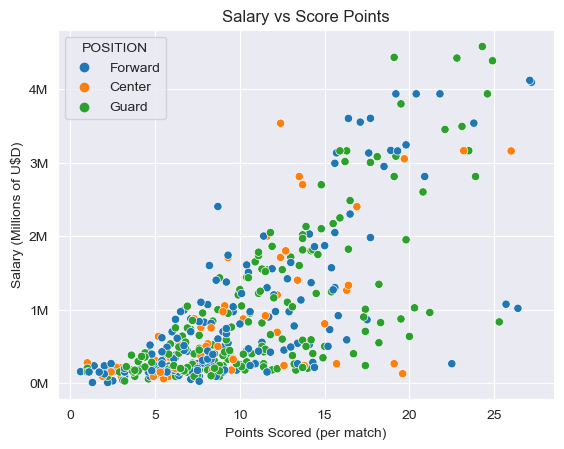

In [48]:
### Complete in this cell:  Relationship between scoring and salary (in millions of dollars)
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

##
s = sns.scatterplot(data = player_dataset, x = 'PTS', y = 'SALARY', hue = 'POSITION' )
ylabels = ['{:.0f}'.format(x) + 'M' for x in s.get_yticks()/10e6]
s.set(ylabel = 'Salary (Millions of U$D)', xlabel = 'Points Scored (per match)', title = 'Salary vs Score Points')
s.set_yticklabels(ylabels)
plt.show()

3.3- Now plot assists-vs-salary and rebounding-vs-salary

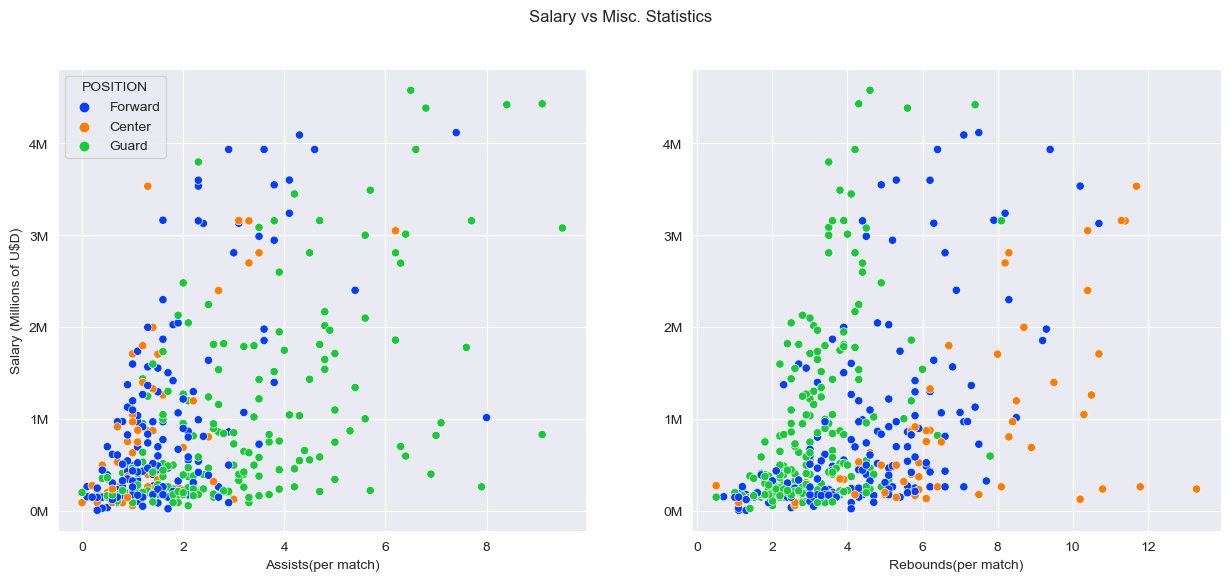

In [49]:
### Complete in this cell: plot assist-vs-salary, rebounding-vs-salary
fig, axes = plt.subplots(1,2, figsize = (15,6))

ax1 = sns.scatterplot(data = player_dataset, x = 'AST', y = 'SALARY', hue = 'POSITION', palette = 'bright', ax = axes[0])
ax1.set(ylabel = 'Salary (Millions of U$D)', xlabel = 'Assists(per match)')
ax1.set_yticklabels(ylabels)


ax2 = sns.scatterplot(data = player_dataset, x = 'REB', y = 'SALARY', hue = 'POSITION', palette = 'bright', ax = axes[1], legend = False)
ax2.set(ylabel = '', xlabel = 'Rebounds(per match)')
ax2.set_yticklabels(ylabels)

_ = fig.suptitle('Salary vs Misc. Statistics')

plt.show()

3.4- When NBA players enter the league, they have low value salaries during what is called their "rookie contract". This means that it doesn't matter how well the player performs, they can't have large salaries. This can distort our understanding of how much teams value each skill, as a player could score 50 points a game and still earn just a couple of millions. So, lets now plot points, assists and rebounding vs salary, but only for players that have more than 4 years of experience (the typical length of a rookie contract)

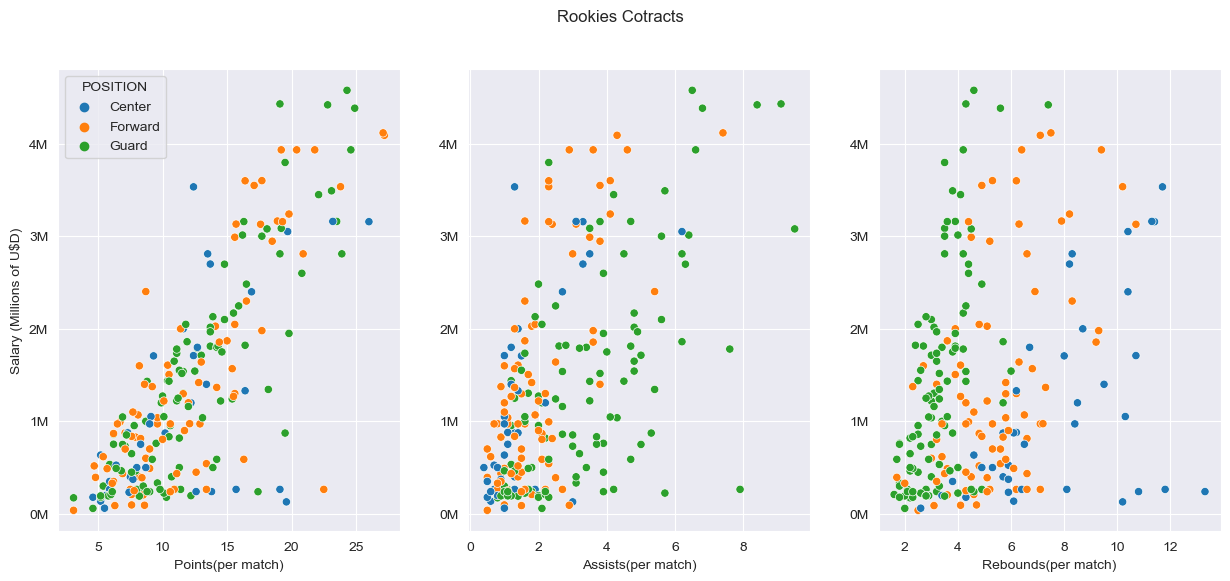

In [50]:
### Complete in this cell: non rookie contracts
non_rookies = player_dataset[player_dataset.SEASON_EXP > 4].copy()

fig, axes = plt.subplots(1,3, figsize = (15,6))

ax0 = sns.scatterplot(data = non_rookies, x = 'PTS', y = 'SALARY', hue = 'POSITION', ax = axes[0])
ax0.set(ylabel = 'Salary (Millions of U$D)', xlabel = 'Points(per match)')
ax0.set_yticklabels(ylabels)

ax1 = sns.scatterplot(data = non_rookies, x = 'AST', y = 'SALARY', hue = 'POSITION', ax = axes[1], legend = False)
ax1.set(ylabel = '', xlabel = 'Assists(per match)')
ax1.set_yticklabels(ylabels)

ax2 = sns.scatterplot(data = non_rookies, x = 'REB', y = 'SALARY', hue = 'POSITION', ax = axes[2], legend = False)
ax2.set(ylabel = '', xlabel = 'Rebounds(per match)')
ax2.set_yticklabels(ylabels)

_ = fig.suptitle('Rookies Contracts')

3.5- Plot the scoring average grouped by position, we want to be able to see median, quartiles, etc 

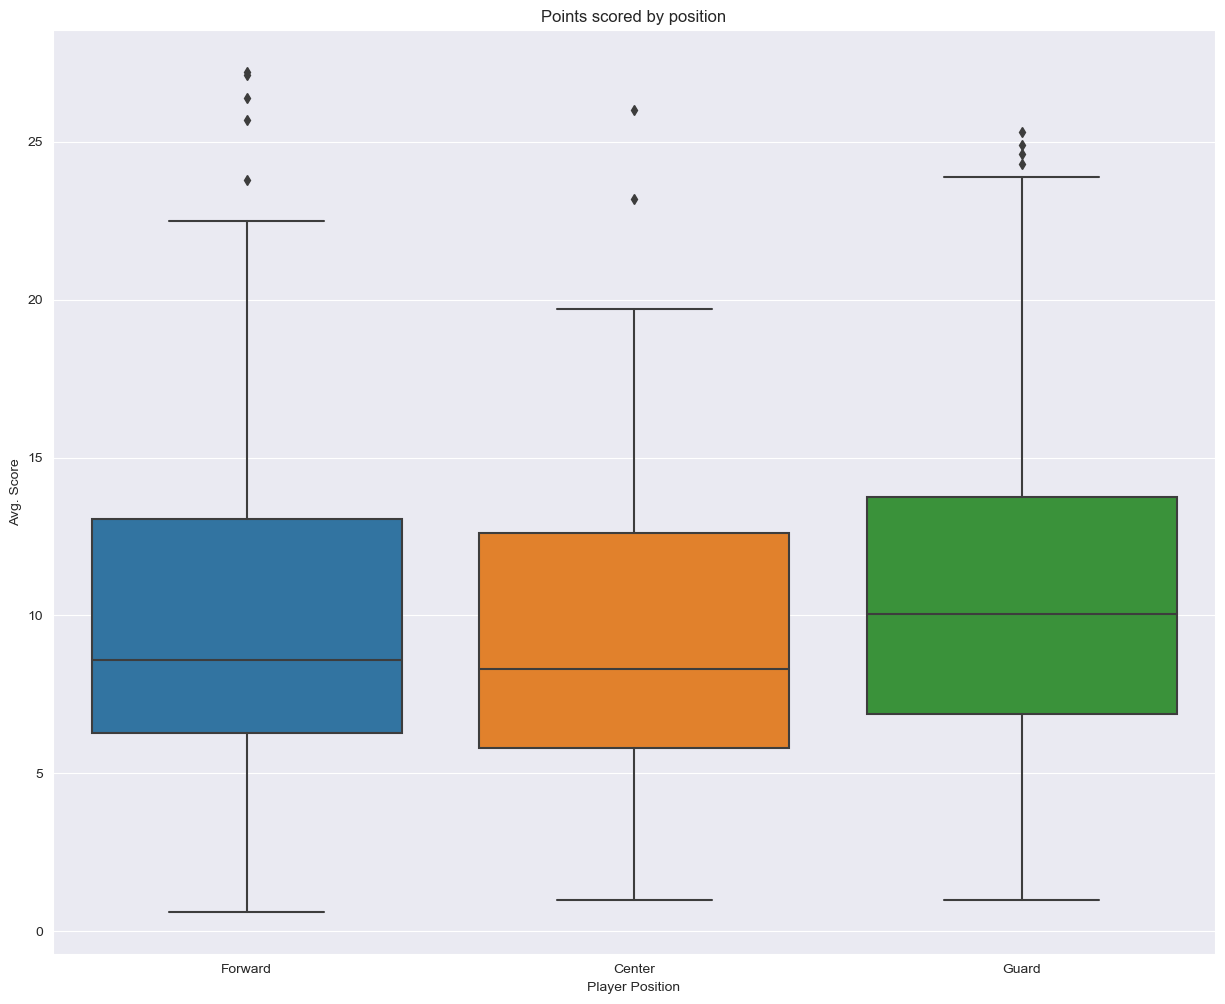

In [51]:
### Complete in this cell: Scoring average grouped by position
fig, ax4 = plt.subplots(1,1,figsize = (15,12))
ax4 = sns.boxplot(data = player_dataset, y = 'PTS', x = 'POSITION', ax = ax4)
ax4.set(xlabel = 'Player Position', ylabel = 'Avg. Score', title = 'Points scored by position')

plt.show()

3.6- Plot the Height distribution of all players

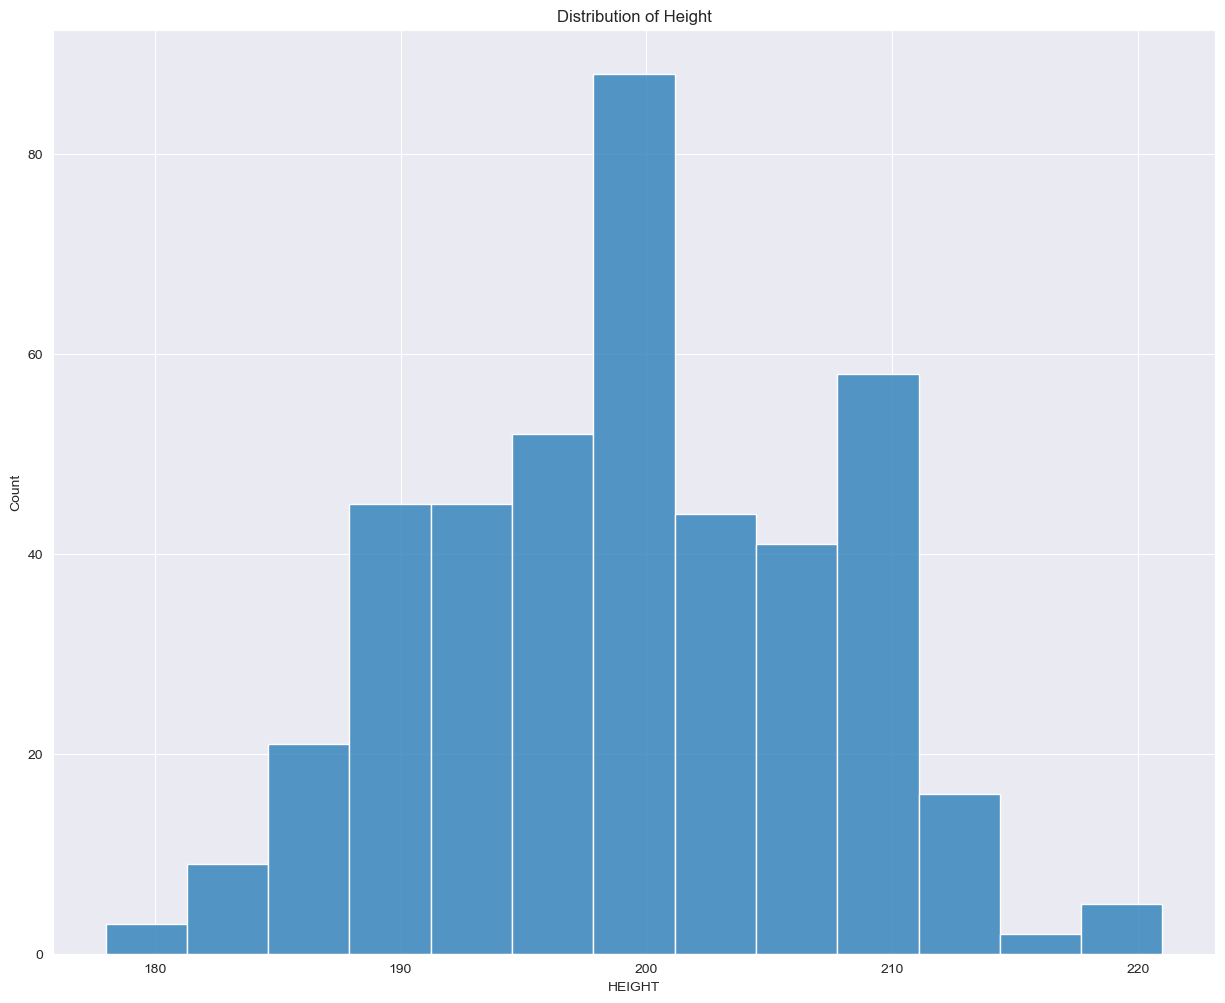

In [52]:
### Complete in this cell: height distribution
fig, ax5 = plt.subplots(1,1,figsize = (15,12))
ax5 = sns.histplot(data = player_dataset, x = 'HEIGHT', ax = ax5) #, bins = 5)
_ = ax5.set(title = 'Distribution of Height')


# OPTIONAL: Can you find a way to draw a world map and show how many active players per country the NBA has? [Example](https://i.redd.it/8qymui9fnin71.jpg)

### Importing the geopandas world dataset

In [53]:
## I have created a new enviornment with geopandas library on it, 
# added the enviroment as a kernel in jupyter and only then was able to import geopandas
# NOTE: This doesn't work when trying to install geopandas in jupyter inline

In [54]:
import geopandas as gpd

In [55]:
!pip install -U shapely

In [56]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.rename(columns = {'name':'country'}, inplace = True)
world.head()

,pop_est,continent,country,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [57]:
player_dataset = pd.read_csv('nba_players_processed_dataset.csv')
player_dataset.head()

,PLAYER_ID,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,AGE
0,1630173,Precious Achiuwa,Raptors,Forward,203.0,101.0,Nigeria,1999-09-19,2,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2711280,"23 years, 0 months, 0 days"
1,203500,Steven Adams,Grizzlies,Center,211.0,119.0,New Zealand,1993-07-20,9,12,664,26.8,9.3,8.0,1.5,0.9,0.9,17073171,"29 years, 1 months, 30 days"
2,1628389,Bam Adebayo,Heat,Center,206.0,115.0,USA,1997-07-18,5,14,343,28.2,13.5,8.3,3.5,1.0,0.9,28103550,"25 years, 2 months, 1 days"
3,1630583,Santi Aldama,Grizzlies,Forward,211.0,97.0,Spain,2001-01-10,1,30,32,11.2,4.1,2.7,0.7,0.2,0.3,1994520,"21 years, 8 months, 9 days"
4,200746,LaMarcus Aldridge,Nets,Center,211.0,112.0,USA,1985-07-19,17,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2641691,"37 years, 2 months, 0 days"


### Explorig world dataset

In [58]:
# List of countries in player_dataset NOT in world dataset
def country_diff(df1,df2, countries_only = True ):
    return  [country for country in player_dataset.COUNTRY.unique() if country not in world.country.unique()]if countries_only  \
            else [(country,country in df1.country.unique()) for country in df2.COUNTRY.unique()] 

In [59]:
country_diff(world,player_dataset, countries_only= False)

[('Nigeria', True),
 ('New Zealand', True),
 ('USA', False),
 ('Spain', True),
 ('Canada', True),
 ('Greece', True),
 ('United Kingdom', True),
 ('Israel', True),
 ('Bahamas', True),
 ('France', True),
 ('Latvia', True),
 ('Georgia', True),
 ('DRC', False),
 ('Serbia', True),
 ('Croatia', True),
 ('Sudan', True),
 ('Argentina', True),
 ('Germany', True),
 ('Saint Lucia', False),
 ('Slovenia', True),
 ('Switzerland', True),
 ('Senegal', True),
 ('Dominican Republic', False),
 ('Cameroon', True),
 ('Angola', True),
 ('Italy', True),
 ('Australia', True),
 ('Japan', True),
 ('Republic of the Congo', False),
 ('Turkey', True),
 ('Czech Republic', False),
 ('Ukraine', True),
 ('Brazil', True),
 ('Finland', True),
 ('Bosnia and Herzegovina', False),
 ('Austria', True),
 ('Jamaica', True),
 ('Lithuania', True),
 ('Montenegro', True)]

In [60]:
countries_to_replace = [country for country in player_dataset.COUNTRY.unique() if country not in world.country.unique()]
countries_to_replace

['USA',
 'DRC',
 'Saint Lucia',
 'Dominican Republic',
 'Republic of the Congo',
 'Czech Republic',
 'Bosnia and Herzegovina']

In [61]:
# Standarizing country names
countries_to_replace = {'USA':'United States of America', 
                        'DRC':'Democratic Republic Congo', 
                        'Dem. Rep. Congo': 'Democratic Republic Congo',
                        'Congo': 'Republic of the Congo',
                        'Czechia': 'Czech Republic', 
                        'Bosnia and Herz.': 'Bosnia and Herzegovina',
                        'Dominican Rep.': 'Dominican Republic'}

world.replace(countries_to_replace, inplace = True)
player_dataset.replace(countries_to_replace, inplace = True)

In [62]:
# checking the differences after replacement
country_diff(world,player_dataset)

['Saint Lucia']

In [63]:
# Dataframe with number of active players per_country
n_player_active_per_country = pd.DataFrame(player_dataset.COUNTRY.value_counts().copy())
# n_player_active_per_country = pd.DataFrame(n_player_active_per_country.COUNTRY.astype(str))
n_player_active_per_country.reset_index(inplace=True)
n_player_active_per_country.rename(columns={'COUNTRY':'player_count','index':'country'},inplace= True)
n_player_active_per_country

,country,player_count
0,United States of America,323
1,Canada,17
2,France,8
3,Australia,7
4,Germany,7
5,Serbia,5
6,Spain,5
7,Nigeria,4
8,Turkey,4
9,Japan,3


### Merging world dataset with count of active player (per country)

In [64]:
world_player_ds = world.merge(n_player_active_per_country, how = 'left', on = 'country')
# world_player_ds.fillna(value = 0,inplace=True)
world_player_ds

,pop_est,continent,country,iso_a3,gdp_md_est,geometry,player_count
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",17.0
4,326625791,North America,United States of America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",323.0
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",5.0
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",2.0
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN


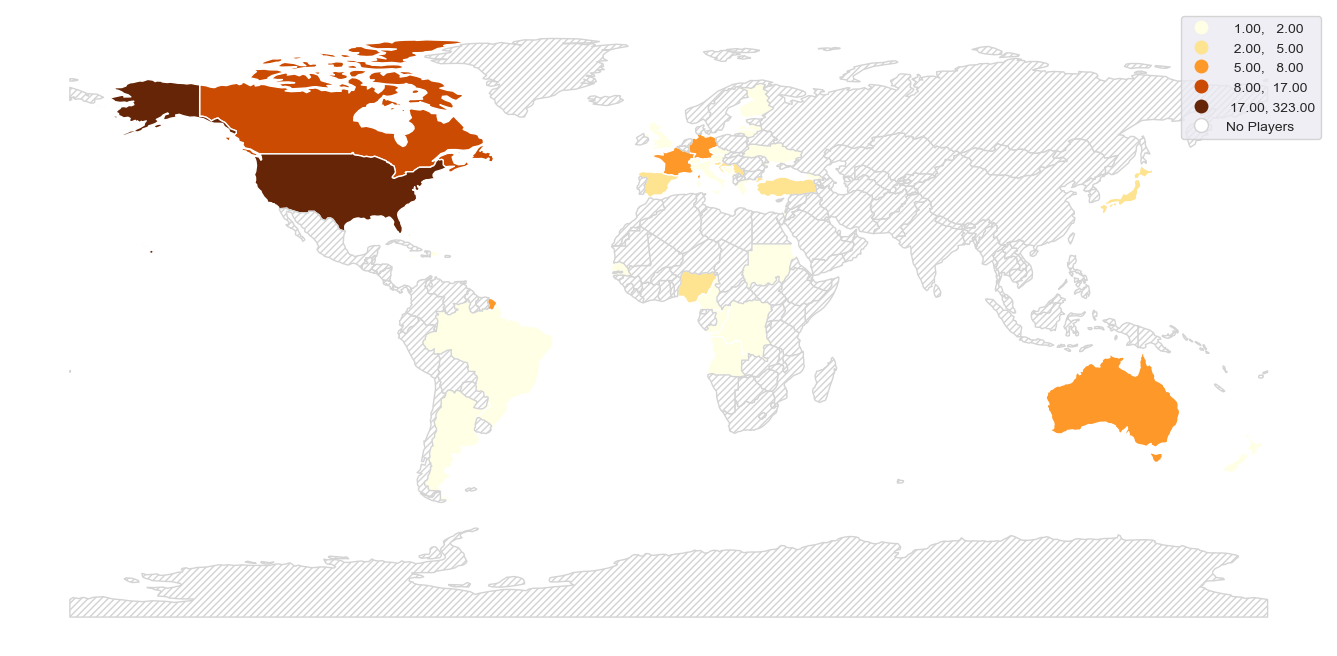

In [65]:
fix, ax = plt.subplots(1,1,figsize = (17,15))
_ = world_player_ds.plot(column = 'player_count', 
                         ax = ax, 
                         scheme = 'fisher_jenks', 
                         cmap = 'YlOrBr', 
                         legend = True,
                             missing_kwds={
                                "color": "white",
                                "edgecolor": "lightgray",
                                "hatch": "/////",
                                "label": "No Players",
                            },
                        )
ax.set_axis_off()